In [1]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing 

In [3]:
df = pd.read_csv('Tesla Stock Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3654 non-null   object 
 1   Adj Close  3654 non-null   float64
 2   Close      3654 non-null   float64
 3   High       3654 non-null   float64
 4   Low        3654 non-null   float64
 5   Open       3654 non-null   float64
 6   Volume     3654 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 200.0+ KB


In [4]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


#### For any trading data, these columns represent:

#### 1. Adjusted Close --> The closing price of the asset adjusted for factors like splits, dividends, and other events that affect the stock's price. This value reflects the true value of the asset over time for analysis and comparison.

#### 2. Close --> The last traded price of the asset for the given period (e.g., day, hour). It represents the final price when the market is closed.

#### 3. High --> The highest price the asset reached during the given period.

#### 4. Open --> The first traded price of the asset when the market opened for the period.

#### 5. Volume --> The total amount of the asset during the period. For Bitcoin, this is typically measured in BTC or a fraction of it.

#### Let's see if we have any missing values in our dataset:

In [7]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'Date' has 0 missing values
Column 'Adj Close' has 0 missing values
Column 'Close' has 0 missing values
Column 'High' has 0 missing values
Column 'Low' has 0 missing values
Column 'Open' has 0 missing values
Column 'Volume' has 0 missing values


#### Now we can check the datatype

In [9]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'Date' has 3654 unique categorical items
Column 'Adj Close' has 3448 unique numerical items
Column 'Close' has 3448 unique numerical items
Column 'High' has 3337 unique numerical items
Column 'Low' has 3354 unique numerical items
Column 'Open' has 3340 unique numerical items
Column 'Volume' has 3623 unique numerical items


#### As we can see, the 'Date' column present categorical values, and they should be in the correct date format, so we are going to convert them:

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3654 entries, 0 to 3653
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
3654 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.7 KB


#### Now that the Date column is in the correct format, we are going to generate some new columns:

In [13]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Year
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500,2010
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500,2010
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000,2010
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000,2010
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500,2010


#### Next, we will estimate the trading value in dollars for each period by averaging the high and low prices (which gives us a rough estimate of the trading price) and multiplying this average price by the trading volume to estimate the total value of trades during the period.

In [15]:
df['Dollars'] = ((df['High'] + df['Low'])/2) * df['Volume']
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Dollars
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500,2010,3.991592e+08
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500,2010,4.616455e+08
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000,2010,1.898132e+08
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000,2010,1.074475e+08
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500,2010,1.230205e+08


#### Now we can perform a simple statistical analysis of the dataset:


In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3654,2017-09-29 20:11:49.359606016,2010-06-29 00:00:00,2014-02-13 06:00:00,2017-09-28 12:00:00,2021-05-17 18:00:00,2025-01-03 00:00:00,NaN
Adj Close,3654.0,81.69598,1.053333,12.0985,17.936666,177.992496,479.859985,107.839958
Close,3654.0,81.69598,1.053333,12.0985,17.936666,177.992496,479.859985,107.839958
High,3654.0,83.507689,1.108667,12.371166,18.221666,182.605,488.540009,110.325408
Low,3654.0,79.793275,0.998667,11.821833,17.679,174.707504,457.51001,105.251783
Open,3654.0,81.707033,1.076,12.164833,17.964667,178.017502,475.899994,107.891905
Volume,3654.0,96678269.020252,1777500.0,48994500.0,82037050.0,122376875.0,914082000.0,77709957.28138
Year,3654.0,2017.236727,2010.0,2014.0,2017.0,2021.0,2025.0,4.19763
Dollars,3654.0,8678019231.527281,2471317.74947,715175406.445026,1872508726.933658,15813124568.891335,146996458017.713928,12094570604.242023


## Exploratory data analysis

#### We can start analysing the data by plotting an evolution of the closing price of Tesla in boxplot and scatter formats

Text(0.5, 1.0, 'Yearly Distribution of Tesla Prices')

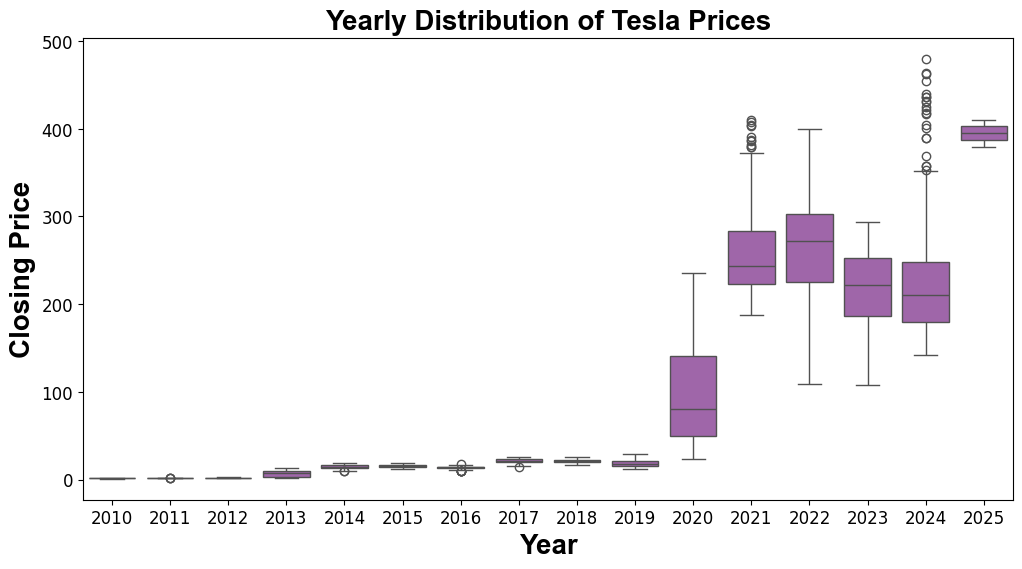

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Year', y = 'Close', data = df, color = '#a75bb4')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Closing Price', fontsize = 20, fontweight='bold', **csfont)
plt.title('Yearly Distribution of Tesla Prices', fontsize = 20, fontweight='bold', **csfont)

#### Each box represents the distribution of Tesla closing prices for a given year. The middle line in each box is the median closing price, and the box edges represent the interquartile range (IQR), showing the spread of the middle 50% of prices. The whiskers in the boxplots extend the minimum and maximum prices within 1.5 times the IQR, and the dots outside the whiskers represent extreme price fluctuations (outliers).

#### With the box plot we can focus on the distribution and summary statistics of prices within each year (median, range, and outliers). 

#### We can see that the price of Tesla closing stock prices started increasing in 2013. Overall, the prices in the 2010 - 2019 were relatively low and stable. In 2020 we have a sharp increase in the stock prices, where the range of prices widens indicating greater volatility and outliers appear at high end, showing that some days had exceptionally high prices. In 2021 - 2024, the median prices increase noticeably year after year and the IQR expands, showing increased volatility in stock prices. There are much more outliers, suggesting rapid price surges on specific days. In 2025 we see a stabilization at high levels.

Text(0.5, 1.0, 'Yearly Distribution of Tesla Prices')

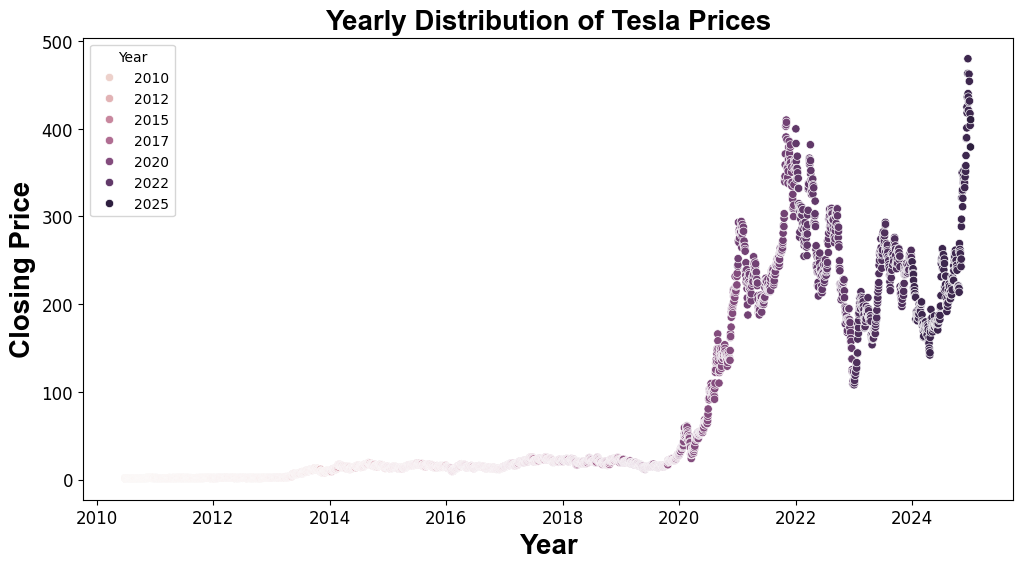

In [73]:
from seaborn import scatterplot

plt.figure(figsize=(12, 6))
scatterplot(data = df, x = 'Date', y = 'Close', hue = 'Year', color = '#a75bb4')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Closing Price', fontsize = 20, fontweight='bold', **csfont)
plt.title('Yearly Distribution of Tesla Prices', fontsize = 20, fontweight='bold', **csfont)

#### With the scatter plot we can see a more detailed daily view of Teslas's price movement over time, showing specific trends and fluctuations.

#### In the scatter plot, we can see that each point represents the Tesla's closing price for a specific day. The scatter plot clearly shows the trend of increasing Tesla prices over time, with most evident spikes starting after 2019 (as we saw in the boxplot) with noticeable increase in the price volatility as time progresses. We can see a major increase in the stock price in 2022, followed by a drop and another increase in 2025.

#### We can also represent the daily price range of Tesla:

Text(0.5, 1.0, 'Tesla Daily Price Range')

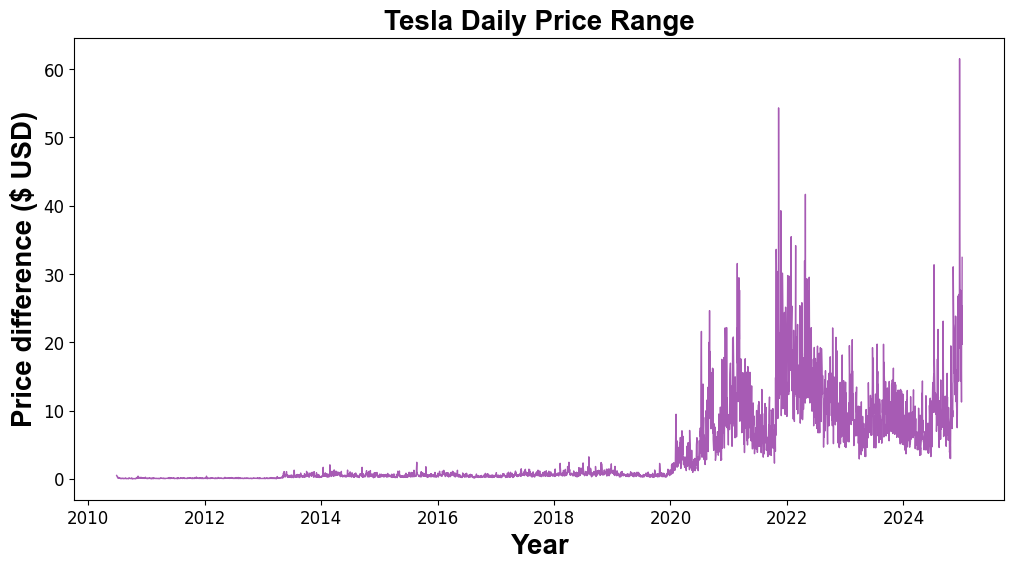

In [76]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['High'] - df['Low'], color = '#a75bb4', linewidth = 1)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Price difference ($ USD)', fontsize = 20, fontweight='bold', **csfont)
plt.title('Tesla Daily Price Range', fontsize = 20, fontweight='bold', **csfont)

#### From this graph, we can see that before 2019, the price range remains relatively small and stable. This is expected because Tesla prices were much lower during this period, with limited market activity and volatility. In 2021 we have Tesla's main spike, represented with a sharp increase in daily price, followed by a higher spike in 2022. Finally, in 2025 we have the final and higher increase in the prices.

#### Let's make a similar plot analysing the volume column over the years:

Text(0.5, 1.0, 'Tesla Volume over the years')

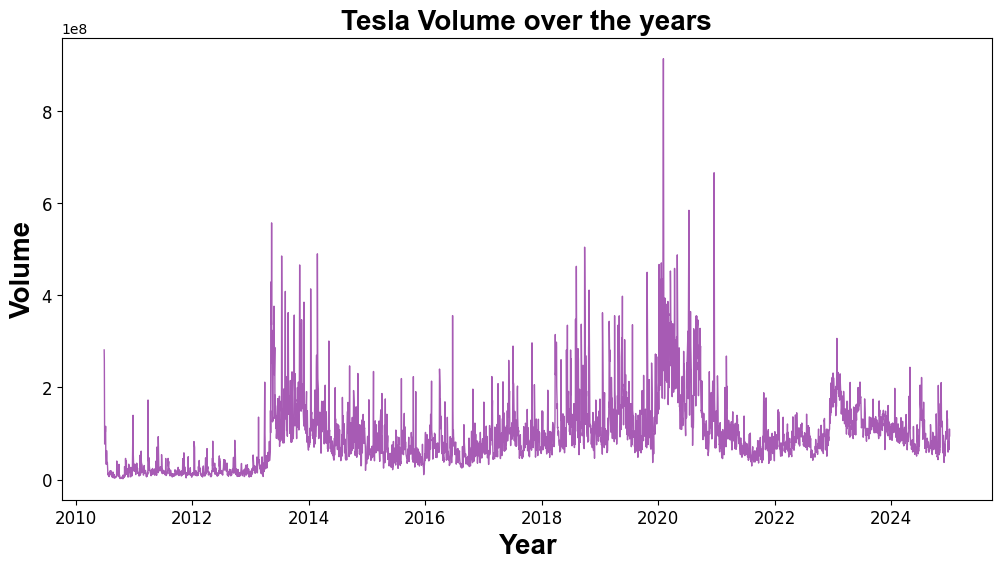

In [79]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Volume'], color = '#a75bb4', linewidth = 1)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Volume', fontsize = 20, fontweight='bold', **csfont)
plt.title('Tesla Volume over the years', fontsize = 20, fontweight='bold', **csfont)

#### We can see that the volume (total number of assets) of Tesla has generally increased over the years, with significant spikes at certain points.

#### We can finally explore the correlation between the different components of the dataset with a correlation map:

Text(0.5, 1.0, 'Correlation map')

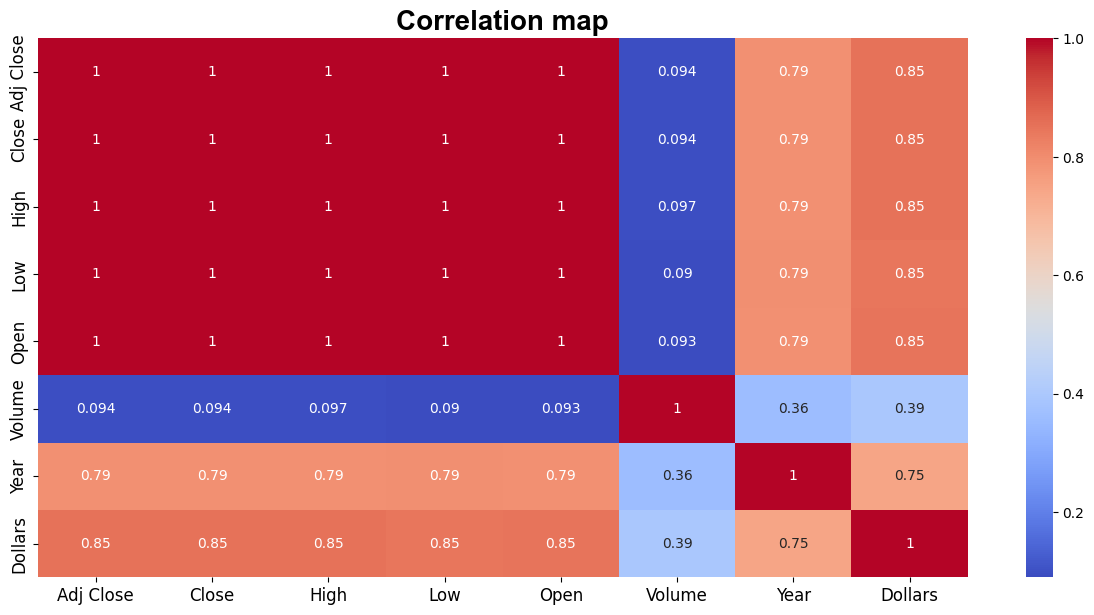

In [27]:
corr = df.corr(numeric_only = True)

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### There is a strong correlation between the Adj Close, Close, High, Low and Open columns, which is expected as they all represent different aspects of the Tesla price. There is also a strong correlation between the Volume and Dollars columns, suggesting that increased trading activity often leads to higher prices. There is a moderate correlation between trading volume and the price variables, suggesting that higher trading volumes lead to higher prices.

## Train/test split

In [30]:
data = df.filter(['Close'])                               # Create a new dataframe with only the 'Close' column 
dataset = data.values                                     # Convert the dataframe to a numpy array
training_data_len = int(np.ceil( len(dataset) * 0.95 ))    # Get the number of rows to train the model on

#### We are going to use the LSTM model for the prediction of the dogecoin close value. This model often benefits from scaling. This step helps stabilise the training by putting all features on a similar scale, which can speed up convergence and prevent exploding gradients.

In [32]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [33]:
train_data = scaled_data[0:int(training_data_len), :]

X_train = []
y_train = []

for i in range (60, len(train_data)):             # Starts the loop at index 60 because we need 60 previous data points to form the first sequence and ends at the last data point
    X_train.append(train_data[i-60:i, 0])         # X takes the first 60 points
    y_train.append(train_data[i, 0])              # y takes the next point (61)
    if i <= 61:
        print('X_train = ', X_train)
        print('y_train = ', y_train)
        print()

X_train =  [array([1.12641280e-03, 1.11805880e-03, 8.57688465e-04, 4.73399704e-04,
       4.31634707e-05, 0.00000000e+00, 2.31130854e-04, 2.22776609e-04,
       1.74045136e-04, 3.25809799e-04, 5.62510895e-04, 5.69471894e-04,
       6.73898329e-04, 8.50727466e-04, 6.26557611e-04, 6.15419615e-04,
       7.24022798e-04, 7.64400276e-04, 7.17061799e-04, 6.61367087e-04,
       6.85036325e-04, 6.33520851e-04, 5.76432893e-04, 7.12884802e-04,
       8.56295468e-04, 7.60223278e-04, 6.47442848e-04, 5.27701420e-04,
       5.29094416e-04, 4.49730465e-04, 2.92393569e-04, 2.50623094e-04,
       3.50872282e-04, 4.14920990e-04, 4.66438705e-04, 4.13527994e-04,
       4.16313986e-04, 4.59475465e-04, 6.02888373e-04, 4.73399704e-04,
       5.70864890e-04, 5.49979653e-04, 5.43016663e-04, 5.66687893e-04,
       5.12386177e-04, 6.47442848e-04, 7.32377042e-04, 7.30983797e-04,
       6.59974090e-04, 7.10098560e-04, 6.83645320e-04, 6.08458367e-04,
       6.85036325e-04, 7.40731037e-04, 8.60472466e-04, 7.15668803

In [34]:
# Now we transform our data into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# And we reshape it to the correct shape required by the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3412, 60, 1)

## LSTM Model training

In [36]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [37]:
# Initialize the LSTM model
lstm = tf.keras.models.Sequential()

# Add LSTM layers
lstm.add(tf.keras.layers.LSTM(units = 128, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm.add(tf.keras.layers.LSTM(units = 64, activation = 'relu', return_sequences = False))

# Add Dense layers
lstm.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
lstm.add(tf.keras.layers.Dense(units = 1))  # Output layer (no activation, assuming regression)

# Compile the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Display the model summary
lstm.summary()

C:\Users\gabri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
lstm.fit(X_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
3412/3412 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - loss: 0.0036
Epoch 2/2
3412/3412 ━━━━━━━━━━━━━━━━━━━━ 76s 22ms/step - loss: 6.3750e-04


#### We need to create the test dataset to evaluate the performance of the model

In [40]:
test_data = scaled_data[training_data_len - 60:, :]

X_test = []
y_test = test_data[training_data_len:, :]

for i in range(60, len(test_data)):

    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [41]:
y_pred = lstm.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


In [42]:
y_pred = sc.inverse_transform(y_pred)  # Apply the inverse scaler to recover the original data

In [43]:
train_data = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred

C:\Users\gabri\AppData\Local\Temp\ipykernel_16708\1144065399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


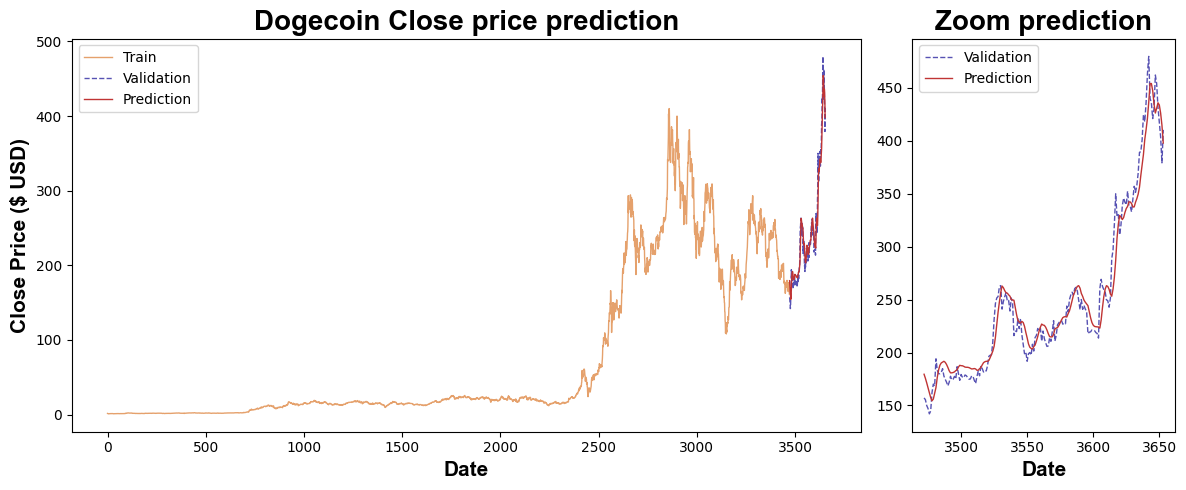

In [44]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 5))
csfont = {'fontname':'Arial'}

gs = gridspec.GridSpec(1, 2, width_ratios=[0.9, 0.3])  # Control width of each subplot (70% and 30%)

ax1 = fig.add_subplot(gs[0])  # First subplot
ax2 = fig.add_subplot(gs[1])  # Second subplot

ax1.plot(train_data['Close'], color = '#e5a16c', linewidth = 1, label = 'Train')
ax1.plot(valid['Close'], '--', color = '#5752b3', linewidth = 1, label = 'Validation')
ax1.plot(valid['Predictions'], color = '#c03434', linewidth = 1, label = 'Prediction')
ax1.set_title("Dogecoin Close price prediction", fontsize = 20, fontweight='bold', **csfont)
ax1.set_xlabel("Date", fontsize=15, fontweight='bold', **csfont)
ax1.set_ylabel("Close Price ($ USD)", fontsize=15, fontweight='bold', **csfont)
ax1.legend()

ax2.plot(valid['Close'], '--', color = '#5752b3', linewidth = 1, label = 'Validation')
ax2.plot(valid['Predictions'], color = '#c03434', linewidth = 1, label = 'Prediction')
ax2.set_title("Zoom prediction", fontsize = 20, fontweight='bold', **csfont)
ax2.set_xlabel("Date", fontsize=15, fontweight='bold', **csfont)
ax2.legend()

plt.tight_layout()